# Experiment for downstream localization models at Uji1

In [131]:
# Dataset: UJIIndoorLoc Data Set 
# Candidates for downstream models:
# KNN, Random Forest (RF), Decision Tree (DT) and Gasussian Processes (GSs)

In [1]:
from pandas import DataFrame, concat
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from numpy import linalg as LA
import statistics
import matplotlib.pyplot as plt

# Data Cleaning and Exploration

In [2]:
data = pd.read_csv("trainingData.csv")

In [3]:
data.groupby('BUILDINGID').size()
temp = data.groupby('BUILDINGID').get_group(2)
temp.groupby("FLOOR").size()
temp_floor = temp.groupby("FLOOR").get_group(3)

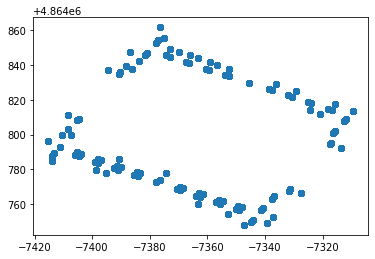

In [4]:
plt.scatter(x=temp_floor['LONGITUDE'],y=temp_floor['LATITUDE'])

USERID
11    613
dtype: int64

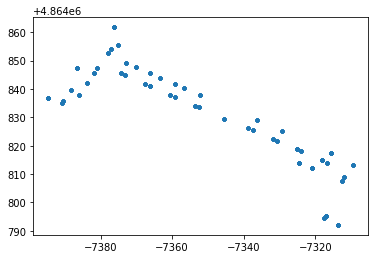

In [5]:
temp_floor.groupby("PHONEID").size()
temp_phone = temp_floor.groupby("PHONEID").get_group(13)
plt.scatter(x=temp_phone['LONGITUDE'],y=temp_phone['LATITUDE'],marker='.')
temp_phone.groupby('USERID').size()

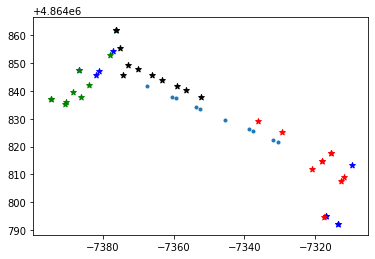

In [135]:
plt.scatter(x=temp_phone[9:14]['LONGITUDE'],y=temp_phone[9:14]['LATITUDE'],c='b',marker='*') # L10 
plt.scatter(x=temp_phone[55:60]['LONGITUDE'],y=temp_phone[55:60]['LATITUDE'],c='b',marker='*') # L10 
plt.scatter(x=temp_phone[28:38]['LONGITUDE'],y=temp_phone[28:38]['LATITUDE'],marker='.')  # test   
plt.scatter(x=temp_phone[45:55]['LONGITUDE'],y=temp_phone[45:55]['LATITUDE'],c='r',marker='*') # U10 labeled
plt.scatter(x=temp_phone[0:9]['LONGITUDE'],y=temp_phone[0:9]['LATITUDE'],c='g',marker='*') # U20 labeled
plt.scatter(x=temp_phone[14:15]['LONGITUDE'],y=temp_phone[14:15]['LATITUDE'],c='g',marker='*') # U20 labeled
plt.scatter(x=temp_phone[15:25]['LONGITUDE'],y=temp_phone[15:25]['LATITUDE'],c='black',marker='*') # U30 labeled

In [20]:
pd.concat([temp_phone[9:14],temp_phone[55:60]],axis=0)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
7396,100,100,100,100,100,100,100,100,100,100,...,100,-7386.709566,4.864847e+06,3,2,102,1,11,13,1371715309
7397,100,100,100,100,100,100,100,100,100,100,...,100,-7380.934600,4.864847e+06,3,2,103,2,11,13,1371715369
7398,100,100,100,100,100,100,100,100,100,100,...,100,-7381.754700,4.864846e+06,3,2,102,2,11,13,1371715268
7399,100,100,100,100,100,100,100,100,100,100,...,100,-7376.317117,4.864862e+06,3,2,106,1,11,13,1371715503
7400,100,100,100,100,100,100,100,100,100,100,...,100,-7377.096400,4.864854e+06,3,2,105,2,11,13,1371715427
7442,100,100,100,100,100,100,100,100,100,100,...,100,-7316.963900,4.864795e+06,3,2,136,2,11,13,1371717416
7443,100,100,100,100,100,100,100,100,100,100,...,100,-7309.517500,4.864813e+06,3,2,131,2,11,13,1371716888
7444,100,100,100,100,100,100,100,100,100,100,...,100,-7316.963900,4.864795e+06,3,2,136,2,11,13,1371717442
7445,100,100,100,100,100,100,100,100,100,100,...,100,-7313.731120,4.864792e+06,3,2,136,1,11,13,1371717463
7446,100,100,100,100,100,100,100,100,100,100,...,100,-7313.731120,4.864792e+06,3,2,136,1,11,13,1371717476


# Select APs

In [35]:
final_dataset = temp_phone[:60]
temp1 = []
for i in final_dataset.iloc[:,:-7]:
    temp1.append({"ap":i, "strength":sum(final_dataset[i])})
sorted(temp1, key=lambda k: k['strength'])

[{'ap': 'LONGITUDE', 'strength': -441049.31884263456},
 {'ap': 'WAP012', 'strength': -2162},
 {'ap': 'WAP128', 'strength': -2143},
 {'ap': 'WAP011', 'strength': -1577},
 {'ap': 'WAP127', 'strength': -1193},
 {'ap': 'WAP144', 'strength': 343},
 {'ap': 'WAP145', 'strength': 532},
 {'ap': 'WAP511', 'strength': 867},
 {'ap': 'WAP131', 'strength': 1009},
 {'ap': 'WAP132', 'strength': 1015},
 {'ap': 'WAP502', 'strength': 1255},
 {'ap': 'WAP066', 'strength': 1575},
 {'ap': 'WAP138', 'strength': 1630},
 {'ap': 'WAP496', 'strength': 1715},
 {'ap': 'WAP248', 'strength': 1893},
 {'ap': 'WAP087', 'strength': 2066},
 {'ap': 'WAP065', 'strength': 2157},
 {'ap': 'WAP483', 'strength': 2242},
 {'ap': 'WAP118', 'strength': 2369},
 {'ap': 'WAP139', 'strength': 2406},
 {'ap': 'WAP084', 'strength': 2408},
 {'ap': 'WAP481', 'strength': 2430},
 {'ap': 'WAP478', 'strength': 2538},
 {'ap': 'WAP117', 'strength': 2566},
 {'ap': 'WAP063', 'strength': 2578},
 {'ap': 'WAP085', 'strength': 2583},
 {'ap': 'WAP064', '

In [36]:
final_dataset = final_dataset.loc[:,('WAP012','WAP128','WAP011','WAP127','LONGITUDE','LATITUDE')]
final_dataset.replace(100,-100,inplace=True)
# final_dataset = final_dataset

In [40]:
training_data = pd.concat([final_dataset[9:14],final_dataset[55:60],
                           final_dataset[45:55],final_dataset[0:9],
                           final_dataset[14:15],final_dataset[15:25]],axis=0)

In [43]:
test_data = final_dataset[28:38].to_numpy()

In [44]:
training_data = training_data.to_numpy()

In [45]:
training_data_10L =  training_data[:10]
training_data_10U =  training_data[10:20]
training_data_20L =  training_data[:20]
training_data_20U =  training_data[10:30]
training_data_30L =  training_data[:30]
training_data_30U =  training_data[10:40]
training_data_40L =  training_data[:40]

# Downstream model performacne evaluation

In [148]:
import importlib
import downstream_models.localization_models as models
importlib.reload(models)
import DG_SSL.dg_ssl as dg_ssl
importlib.reload(dg_ssl)

<module 'DG_SSL.dg_ssl' from '/Users/lawrence/Downloads/IPS/DG_SSL/dg_ssl.py'>

In [137]:
# Label Propagation and Propagation errors

In [139]:
propagation_results_10L_10U = dg_ssl.dg_ssl_int(training_data_10L,training_data_10U)[0]
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_10U[10:,-2:],training_data_10U[:,-2:])))
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_10U[:10,-2:],training_data_10L[:,-2:])))

Propagation Error: 5.116905479514893
Propagation Error: 2.3720193171410795


In [62]:
propagation_results_10L_20U = dg_ssl.dg_ssl_int(training_data_10L,training_data_20U)[0]
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_20U[10:,-2:],training_data_20U[:,-2:])))
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_20U[:10,-2:],training_data_10L[:,-2:])))

16.574769880125114
9.835732603868511


In [140]:
propagation_results_10L_30U = dg_ssl.dg_ssl_int(training_data_10L,training_data_30U)[0]
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_30U[10:,-2:],training_data_30U[:,-2:])))
print ("Propagation Error: "+ str(dg_ssl.prop_error(propagation_results_10L_30U[:10,-2:],training_data_10L[:,-2:])))

Propagation Error: 16.16094536494528
Propagation Error: 15.476393567887285


In [143]:
# model performance of KNN, DT and RF for different training data 

In [141]:
downstream_models_results_10L = models.evaluation_reg(training_data_10L,test_data,[10,0])
downstream_models_results_20L = models.evaluation_reg(training_data_20L,test_data,[20,0])
downstream_models_results_30L = models.evaluation_reg(training_data_30L,test_data,[30,0])
downstream_models_results_40L = models.evaluation_reg(training_data_40L,test_data,[40,0])
downstream_models_results_10L_10U = models.evaluation_reg(propagation_results_10L_10U,test_data,[10,10])
downstream_models_results_10L_20U = models.evaluation_reg(propagation_results_10L_20U,test_data,[10,20])
downstream_models_results_10L_30U = models.evaluation_reg(propagation_results_10L_30U,test_data,[10,30])

Knn error(m) - 30.931317926721935
Random Forest error(m)- 17.07639558445274
Decision Tree error(m)- 30.931317926721935
 
Knn error(m) - 12.091558699504272
Random Forest error(m)- 15.457650007614374
Decision Tree error(m)- 31.431081647351107
 
Knn error(m) - 12.091558699504272
Random Forest error(m)- 10.48887087470563
Decision Tree error(m)- 29.202883131125297
 
Knn error(m) - 10.091931927756182
Random Forest error(m)- 5.0878605644061246
Decision Tree error(m)- 9.904589032848767
 
Knn error(m) - 13.28820560635216
Random Forest error(m)- 7.780429635602153
Decision Tree error(m)- 26.10429692165804
 
Knn error(m) - 19.94738446780008
Random Forest error(m)- 10.082665436297878
Decision Tree error(m)- 16.227843198670733
 
Knn error(m) - 17.170727723572853
Random Forest error(m)- 13.894442003317781
Decision Tree error(m)- 17.454656257350692
 


In [ ]:
# Model performance of GPs for different training data 

In [159]:
# Train GPs 
import importlib
import gps_deployment.gps_starting as gps
import gps_deployment.main_controller as gps1
import gps_deployment.gaussian as gps2
importlib.reload(gps)
importlib.reload(gps1)
importlib.reload(gps2)

<module 'gps_deployment.gaussian' from '/Users/lawrence/Downloads/IPS/gps_deployment/gaussian.py'>

In [152]:
# determine the boundary 
lat_min = int(min(training_data[:,-2]))
lat_max = int(max(training_data[:,-2]))
log_min = int(min(training_data[:,-1]))
log_max = int(max(training_data[:,-1]))

In [160]:
# Hyper-parameter optimization; Four GPs will be trained seperately
gps_results_10L = gps.gps_start(4,training_data_10L)
gps_results_20L = gps.gps_start(4,training_data_20L)
gps_results_30L = gps.gps_start(4,training_data_30L)
gps_results_40L = gps.gps_start(4,training_data_40L)
gps_results_10L_10U = gps.gps_start(4,propagation_results_10L_10U)
gps_results_10L_20U = gps.gps_start(4,propagation_results_10L_20U)
gps_results_10L_30U = gps.gps_start(4,propagation_results_10L_30U)

In [161]:
rlt_10L = gps.gps_evaluation_uji(gps_results_10L,4,test_data,lat_min,lat_max,log_min,log_max,[10,0])
rlt_20L = gps.gps_evaluation_uji(gps_results_20L,4,test_data,lat_min,lat_max,log_min,log_max,[20,0])
rlt_30L = gps.gps_evaluation_uji(gps_results_30L,4,test_data,lat_min,lat_max,log_min,log_max,[30,0])
rlt_40L = gps.gps_evaluation_uji(gps_results_40L,4,test_data,lat_min,lat_max,log_min,log_max,[40,0])
rlt_10L_10U = gps.gps_evaluation_uji(gps_results_10L_10L,4,test_data,lat_min,lat_max,log_min,log_max,[10,10])
rlt_10L_20U = gps.gps_evaluation_uji(gps_results_10L_20L,4,test_data,lat_min,lat_max,log_min,log_max,[10,20])
rlt_10L_30U = gps.gps_evaluation_uji(gps_results_10L_30L,4,test_data,lat_min,lat_max,log_min,log_max,[10,30])

GPs error: 26.129662465636905
GPs error: 37.32386991644411
GPs error: 16.52771729475799
GPs error: 28.029209799372804
GPs error: 39.076266097361795
GPs error: 29.55294532058469
GPs error: 39.22140007998485
